
# Loss function for a classification tree


1.  Mis-classification error
2.  Gini index
3.  Cross-entropy





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


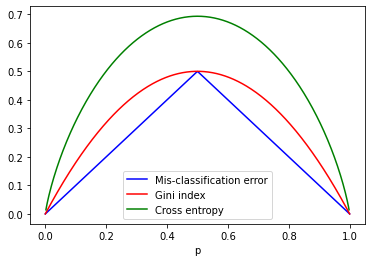

In [24]:
import numpy as np
import matplotlib.pyplot as plt

p_vec = np.linspace(0.0, 1.0, num=500)

# Misclassification
mis_cl_error_vec = np.minimum(1-p_vec, p_vec)

# Gini index
gini_vec = 2*np.multiply(p_vec, 1-p_vec)

# Cross entropy
cross_entropy_vec = -np.multiply(p_vec, np.log(p_vec))- np.multiply(1-p_vec, np.log(1-p_vec))

plt.plot(p_vec, mis_cl_error_vec, 'b')
plt.plot(p_vec, gini_vec, 'r')
plt.plot(p_vec, cross_entropy_vec, 'g')
plt.legend(['Mis-classification error', 'Gini index', 'Cross entropy'] )
plt.xlabel('p')
plt.savefig('LossFuncTreeModel.png', dpi=500)

In [0]:
from google.colab import files

files.download('LossFuncTreeModel.png')

# Numerical Example on Iris Data
## Decision Tree 

In [0]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# load Iris data 
iris = load_iris()

# split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

# construct the decision tree classifier
clf_dt = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=0)
clf_dt = clf_dt.fit(X_train, y_train) 
y_test_est = clf_dt.predict(X_test)

In [27]:
# output the confusion matrix

pd.crosstab(y_test, y_test_est, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,19,0,0
1,0,15,0
2,0,1,15


In [32]:
# calculate the cross-validation score
cross_val_score(clf_dt, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

In [28]:
# calculate feature importance

print(clf_dt.feature_importances_)

[0.         0.         0.06478509 0.93521491]


In [29]:
# install graphviz
!pip install graphviz

In [30]:
# import graphviz
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf_dt, out_file=None, feature_names=iris.feature_names, 
                                class_names=iris.target_names, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris") 

'iris.pdf'

In [31]:
import os
print(os.getcwd())
from google.colab import files
files.download("/content/iris.pdf" ) 

/content


Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     1.     0.    ]
 [0.     0.0625 0.9375]]


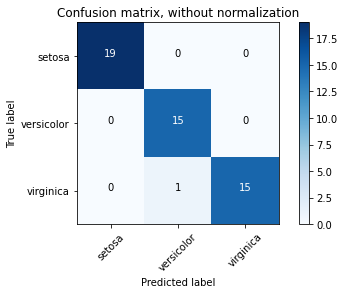

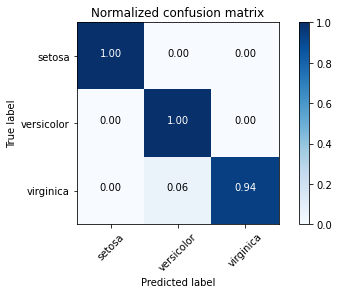

In [10]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b = 0)

## The code for the function plot_confusion_matrix() is attributed to http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Plot non-normalized confusion matrix
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, y_test_est)
plt.figure()
plot_confusion_matrix(cm, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')

In [13]:
# View the importance scores
print(list(zip(iris.feature_names, clf_dt.feature_importances_)))


[('sepal length (cm)', 0.0), ('sepal width (cm)', 0.0), ('petal length (cm)', 0.0647850899647312), ('petal width (cm)', 0.9352149100352688)]


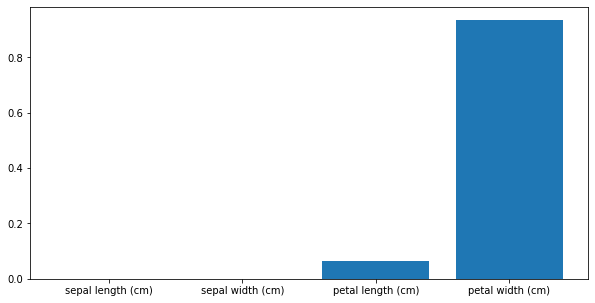

In [17]:
plt.figure(figsize=(10,5))
plt.bar(iris.feature_names, clf_dt.feature_importances_)
plt.show()

## Random Forest
https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/




In [0]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

# construct a random forest Classifier. 
clf_rf = RandomForestClassifier(n_estimators = 20, max_depth = 3, criterion = 'gini', n_jobs=2, random_state=0)
clf_rf = clf_rf.fit(X_train, y_train)
y_test_est_rf = clf_rf.predict(X_test)

In [34]:
 clf_rf.predict_proba(X_test)[0:10]

array([[0.0027027 , 0.95060588, 0.04669141],
       [0.95      , 0.05      , 0.        ],
       [0.        , 0.00494048, 0.99505952],
       [0.0027027 , 0.94060588, 0.05669141],
       [0.0027027 , 0.80480502, 0.19249228],
       [1.        , 0.        , 0.        ],
       [0.0027027 , 0.96616144, 0.03113586],
       [0.        , 0.12660714, 0.87339286],
       [0.0027027 , 0.91203445, 0.08526284],
       [0.0027027 , 0.96616144, 0.03113586]])

In [35]:
# calculate confusion matrix
pd.crosstab(y_test, y_test_est_rf, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,19,0,0
1,0,15,0
2,0,1,15


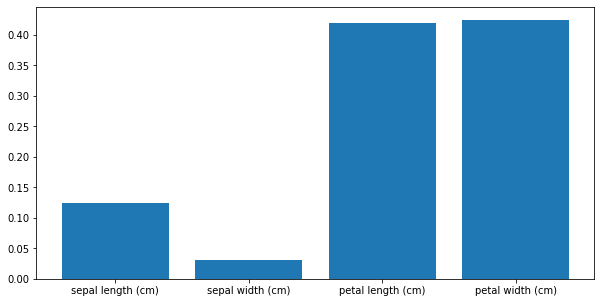

In [36]:
plt.figure(figsize=(10,5))
plt.bar(iris.feature_names, clf_rf.feature_importances_)
plt.show()

Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     1.     0.    ]
 [0.     0.0625 0.9375]]


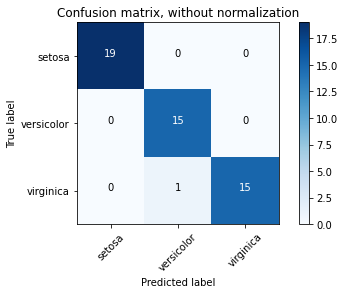

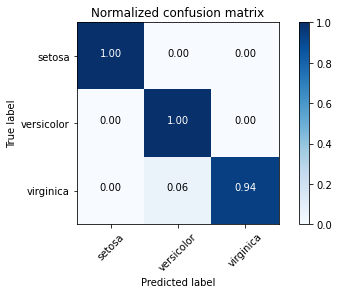

In [37]:
cm_rf =  confusion_matrix(y_test, y_test_est_rf)
plt.figure()
plot_confusion_matrix(cm_rf, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_rf, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')


# Gradient Boosting Tree

In [0]:
# Load scikit's random forest classifier library
from sklearn.ensemble import GradientBoostingClassifier

# Set random seed
np.random.seed(0)

# Construct a random forest Classifier. 
clf_gbt = GradientBoostingClassifier()
clf_gbt.fit(X_train, y_train)
y_test_est_gbt = clf_rf.predict(X_test)

Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     1.     0.    ]
 [0.     0.0625 0.9375]]


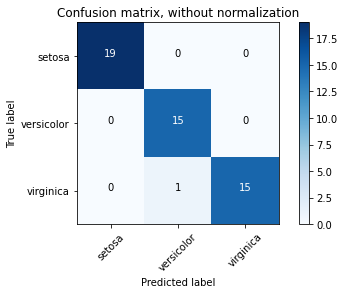

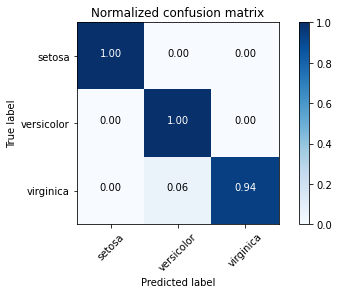

In [40]:
cm_gbt =  confusion_matrix(y_test, y_test_est_gbt)
plt.figure()
plot_confusion_matrix(cm_gbt, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_gbt, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')

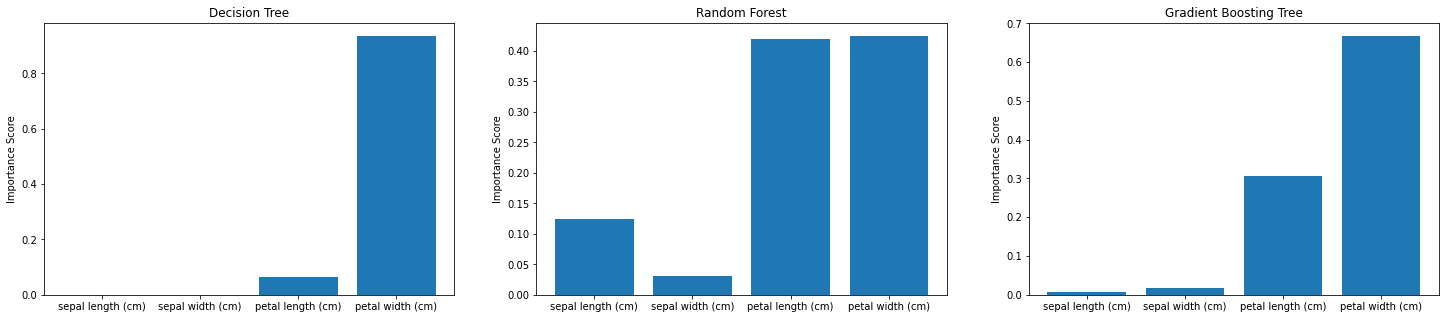

In [41]:
from pylab import *

f = plt.figure(figsize=(25, 5))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.bar(iris.feature_names, clf_dt.feature_importances_)
ax.set_title('Decision Tree')
ax.set_ylabel('Importance Score')

ax2.bar(iris.feature_names, clf_rf.feature_importances_)
ax2.set_title('Random Forest')
ax2.set_ylabel('Importance Score')

ax3.bar(iris.feature_names, clf_gbt.feature_importances_)
ax3.set_title('Gradient Boosting Tree')
ax3.set_ylabel('Importance Score')

plt.show()